In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from matplotlib.ticker import MaxNLocator
from optimization import *
from oracles import *
from utils import *

# 2.1 Эксперимент: Зависимость числа итераций метода сопряженных градиентов от числа обусловленности и размерности пространства

In [2]:
import seaborn as sns
import scipy.sparse

k_num = np.arange(2, 2000, 40)
n_dim = [2, 3, 10, 100, 1000]

In [3]:
def create_matrix_vector(k, n):
    diagonal_elements = np.random.randint(1, k, n)
    diagonal_elements[-1] = k
    diagonal_elements[0] = 1
    matrix = scipy.sparse.diags(diagonal_elements)
    vector = np.random.uniform(0, k, n)
    return matrix, vector

In [4]:
def plot(k_num, n_dim):
    sns.set(style='darkgrid')
    colors = {2: 'c', 3: 'r', 10: 'b', 100: 'g', 1000: 'y'}
    markers = ['o', 's', '^', 'd', 'x']
    
    plt.figure(figsize=(12, 8))
    
    for idx, n in enumerate(n_dim):
        iterations_list = []
        for k in k_num:
            A, b = create_matrix_vector(k, n)
            oracle = QuadraticOracle(A, b)
            matvec = lambda x: oracle.hess_vec(np.zeros(n), x)
            x_star, msg, history = conjugate_gradients(matvec, b, np.zeros(n), tolerance=1e-4, trace=True, display=False)
            iterations = len(history['residual_norm'])
            iterations_list.append(iterations)
        
        plt.plot(k_num, iterations_list, label=f'n = {n}', color=colors[n], marker=markers[idx % len(markers)], linestyle='-', linewidth=1.5, markersize=6)
    
    plt.xlabel('Число обусловленности, k', fontsize=14)
    plt.ylabel('Количество итераций', fontsize=14)
    plt.title('Зависимость количества итераций от обусловленности\nпри разных размерностях пространства', fontsize=16)
    plt.legend(title='Размерность пространства', fontsize=12, title_fontsize='13')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()



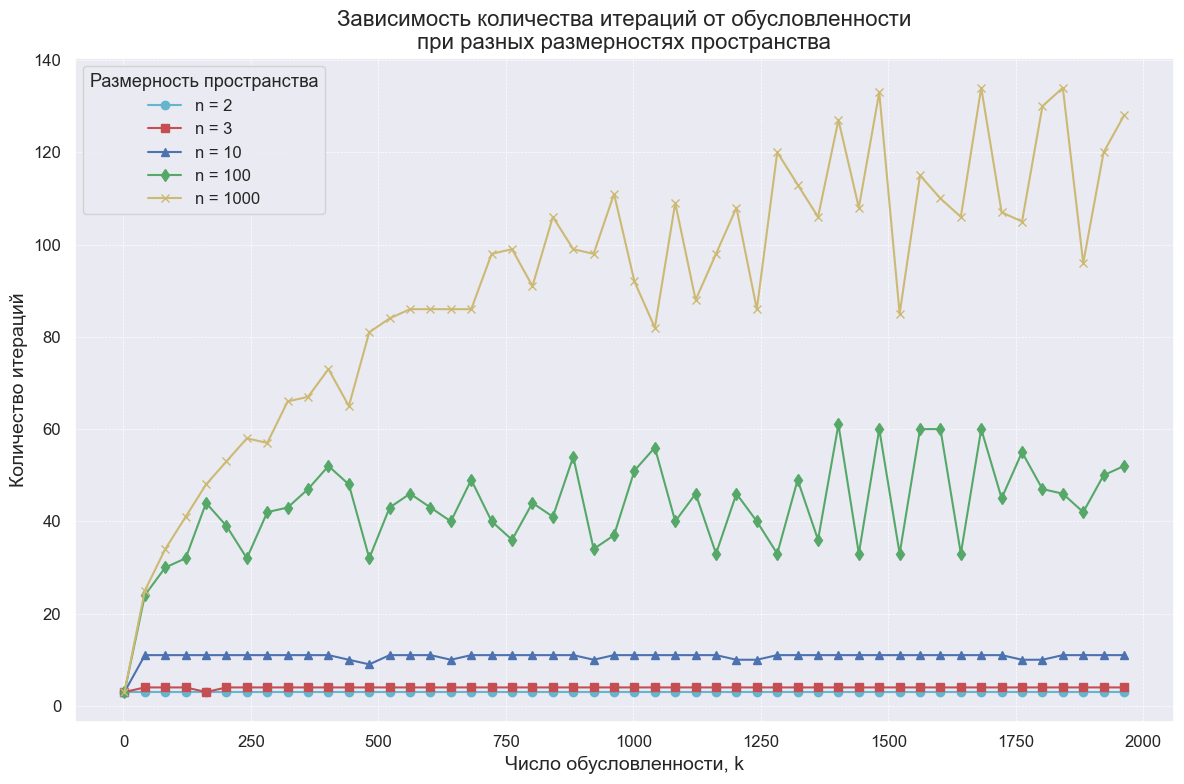

In [5]:
plot(k_num, n_dim)

# 2.2 Эксперимент: Выбор размера истории в методе L- BFGS

### Dataset gisette

In [9]:
gissete = load_svmlight_file('gisette_scale.bz2')

In [10]:
memory_list = [1, 5, 10, 20, 50, 100]

In [11]:
def init_oracle(dataset):
    X, y = dataset
    num_samples = X.shape[0]
    num_features = X.shape[1]
    regularization_coefficient = 1 / num_samples
    logistic_oracle = create_log_reg_oracle(X, y, regcoef=regularization_coefficient)
    starting_point = np.zeros(num_features)
    return logistic_oracle, starting_point


### Dataset gissete

In [12]:
gissete_regul, gissete_x = init_oracle(gissete)

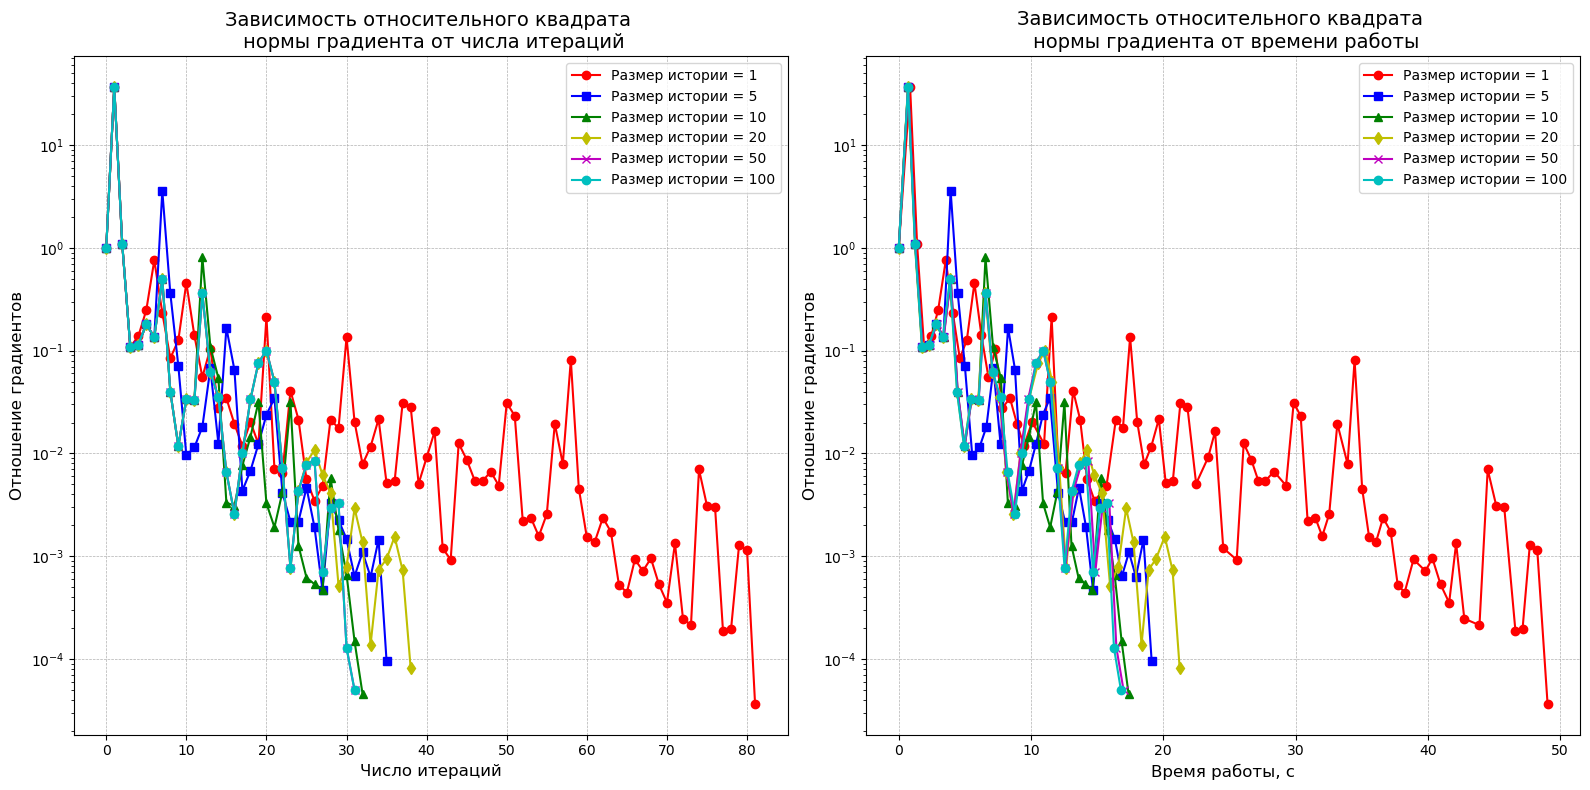

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

markers = ['o', 's', '^', 'd', 'x', 'o']
colors = ['r', 'b', 'g', 'y', 'm', 'c']

for idx, memory in enumerate(memory_list):
    x_k, message, history = lbfgs(gissete_regul, 
                                  gissete_x, 
                                  tolerance=1e-4, 
                                  memory_size=memory, 
                                  line_search_options=None, 
                                  display=False, 
                                  trace=True)

    times = history['time']
    relative_gradients = np.array(history['grad_norm'])**2 / history['grad_norm'][0]**2

    ax[0].plot(np.arange(len(times)), relative_gradients, 
               label=f'Размер истории = {memory}', 
               color=colors[idx % len(colors)], 
               marker=markers[idx % len(markers)], 
               linestyle='-', linewidth=1.5, markersize=6)
    ax[0].set_title('Зависимость относительного квадрата \n нормы градиента от числа итераций', fontsize=14)
    ax[0].set_xlabel('Число итераций', fontsize=12)
    ax[0].set_ylabel('Отношение градиентов', fontsize=12)
    ax[0].set_yscale('log') 
    ax[0].grid(True, linestyle='--', linewidth=0.5)
    ax[0].legend(fontsize=10)
    
    ax[1].plot(times, relative_gradients, 
               label=f'Размер истории = {memory}', 
               color=colors[idx % len(colors)], 
               marker=markers[idx % len(markers)], 
               linestyle='-', linewidth=1.5, markersize=6)
    ax[1].set_title('Зависимость относительного квадрата \n нормы градиента от времени работы', fontsize=14)
    ax[1].set_xlabel('Время работы, с', fontsize=12)
    ax[1].set_ylabel('Отношение градиентов', fontsize=12)
    ax[1].set_yscale('log')
    ax[1].grid(True, linestyle='--', linewidth=0.5)
    ax[1].legend(fontsize=10)

plt.tight_layout()
plt.show()

### Dataset news20

In [16]:
news20 = load_svmlight_file('news20.binary.bz2')

In [17]:
news_regul, news_x = init_oracle(news20)

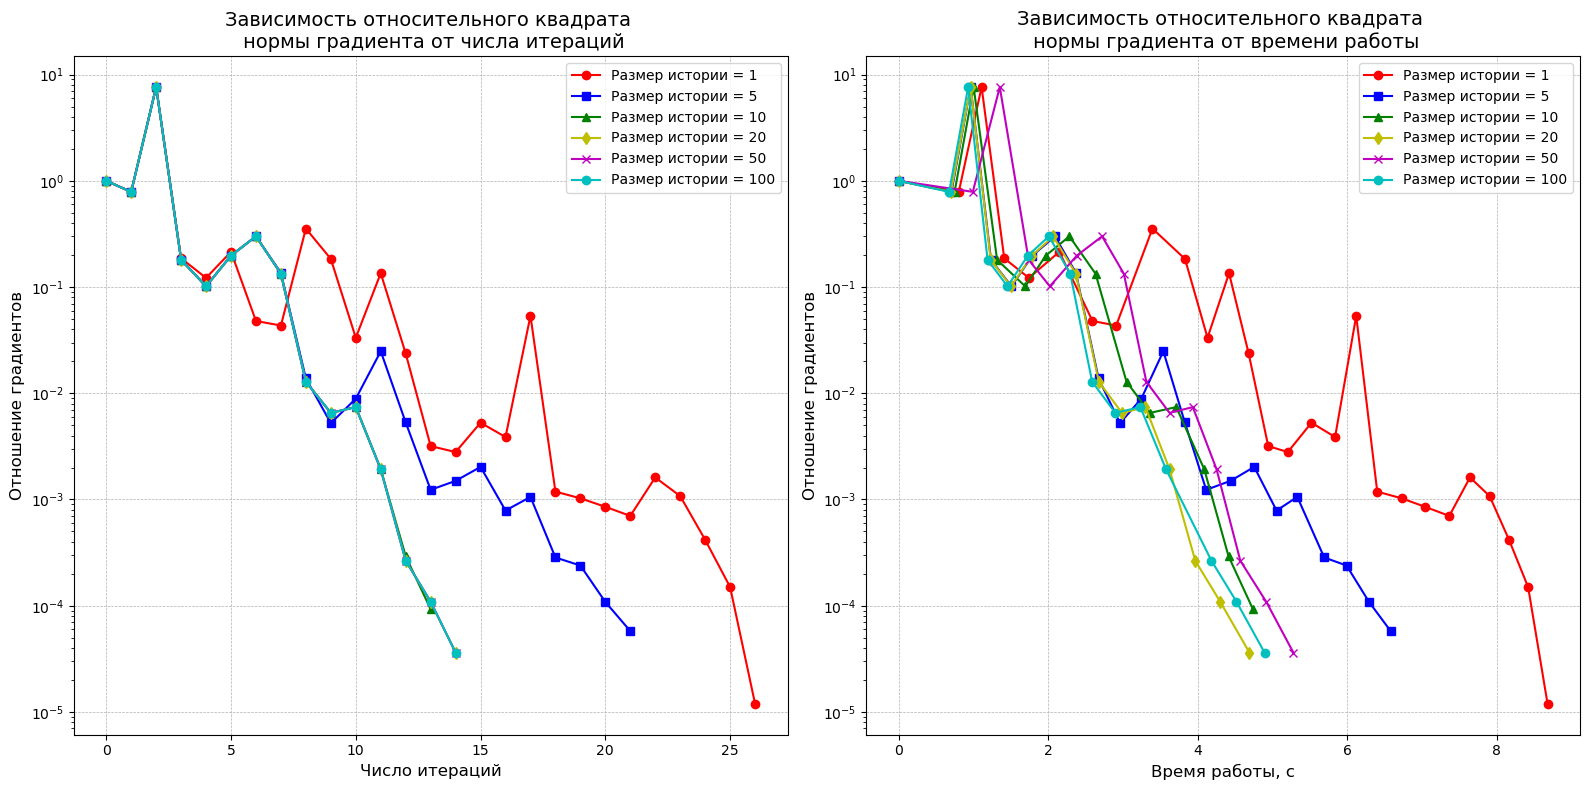

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

markers = ['o', 's', '^', 'd', 'x', 'o']
colors = ['r', 'b', 'g', 'y', 'm', 'c']

for idx, memory in enumerate(memory_list):
    x_k, message, history = lbfgs(news_regul, 
                                  news_x, 
                                  tolerance=1e-4, 
                                  memory_size=memory, 
                                  line_search_options=None, 
                                  display=False, 
                                  trace=True)

    times = history['time']
    relative_gradients = np.array(history['grad_norm'])**2 / history['grad_norm'][0]**2

    ax[0].plot(np.arange(len(times)), relative_gradients, 
               label=f'Размер истории = {memory}', 
               color=colors[idx % len(colors)], 
               marker=markers[idx % len(markers)], 
               linestyle='-', linewidth=1.5, markersize=6)
    ax[0].set_title('Зависимость относительного квадрата \n нормы градиента от числа итераций', fontsize=14)
    ax[0].set_xlabel('Число итераций', fontsize=12)
    ax[0].set_ylabel('Отношение градиентов', fontsize=12)
    ax[0].set_yscale('log') 
    ax[0].grid(True, linestyle='--', linewidth=0.5)
    ax[0].legend(fontsize=10)
    
    ax[1].plot(times, relative_gradients, 
               label=f'Размер истории = {memory}', 
               color=colors[idx % len(colors)], 
               marker=markers[idx % len(markers)], 
               linestyle='-', linewidth=1.5, markersize=6)
    ax[1].set_title('Зависимость относительного квадрата \n нормы градиента от времени работы', fontsize=14)
    ax[1].set_xlabel('Время работы, с', fontsize=12)
    ax[1].set_ylabel('Отношение градиентов', fontsize=12)
    ax[1].set_yscale('log')
    ax[1].grid(True, linestyle='--', linewidth=0.5)
    ax[1].legend(fontsize=10)

plt.tight_layout()
plt.show()

# 2.3 Эксперимент: Сравнение методов на реальной задаче логистической регрессии

In [40]:
def plots(history_lbfgs, history_newton, history_grad):
    time_lbfgs = history_lbfgs['time']
    relative_lbfgs = np.array(history_lbfgs['grad_norm'])**2 / history_lbfgs['grad_norm'][0]**2
    func_lbfgs = history_lbfgs['func']
    
    time_newton = history_newton['time']
    relative_newton = np.array(history_newton['grad_norm'])**2 / history_newton['grad_norm'][0]**2
    func_newton = history_newton['func']
    
    time_grad = history_grad['time']
    relative_grad = np.array(history_grad['grad_norm'])**2 / history_grad['grad_norm'][0]**2
    func_grad = history_grad['func']

    fig, ax = plt.subplots(3, 1, figsize=(10, 20), constrained_layout=True)
    
    ax[0].plot(np.arange(len(time_lbfgs)), func_lbfgs, label='L-BFGS', color='b', marker='o')
    ax[0].plot(np.arange(len(time_grad)), func_grad, label='Градиентный спуск', color='g', marker='x')
    ax[0].plot(np.arange(len(time_newton)), func_newton, label='Усеченный метод Ньютона', color='r', marker='s')
    ax[0].set_title('Зависимость значения функции от номера итерации')
    ax[0].set_xlabel('Число итераций')
    ax[0].set_ylabel('Значение функции')
    ax[0].set_yscale('log')
    ax[0].grid(True, which="both", ls="--")
    ax[0].legend()
    
    ax[1].plot(time_lbfgs, func_lbfgs, label='L-BFGS', color='b', marker='o')
    ax[1].plot(time_grad, func_grad, label='Градиентный спуск', color='g', marker='x')
    ax[1].plot(time_newton, func_newton, label='Усеченный метод Ньютона', color='r', marker='s')
    ax[1].set_title('Зависимость значения функции от времени')
    ax[1].set_xlabel('Время, с')
    ax[1].set_ylabel('Значение функции')
    ax[1].set_yscale('log')
    ax[1].grid(True, which="both", ls="--")
    ax[1].legend()
    
    ax[2].plot(time_lbfgs, relative_lbfgs, label='L-BFGS', color='b', marker='o')
    ax[2].plot(time_grad, relative_grad, label='Градиентный спуск', color='g', marker='x')
    ax[2].plot(time_newton, relative_newton, label='Усеченный метод Ньютона', color='r', marker='s')
    ax[2].set_title('Зависимость относительного квадрата нормы градиента от времени')
    ax[2].set_xlabel('Время, с')
    ax[2].set_ylabel('Относительный квадрат нормы градиента')
    ax[2].set_yscale('log')
    ax[2].grid(True, which="both", ls="--")
    ax[2].legend()
    
    plt.show()

### Dataset gissete

In [20]:
gissete = load_svmlight_file('gisette_scale.bz2')
news20 = load_svmlight_file('news20.binary.bz2')
w8a = load_svmlight_file('w8a')
realsim = load_svmlight_file('real-sim.bz2')
rcv = load_svmlight_file('rcv1_train.binary.bz2')


gissete_regul, gissete_x = init_oracle(gissete)
news20_regul, news20_x = init_oracle(news20)
w8a_regul, w8a_x = init_oracle(w8a)
rcv_regul, rcv_x = init_oracle(rcv)
realsim_regul, realsim_x = init_oracle(realsim)


In [24]:
xk_lbfgs_gissete, msg_lbfgs_gissete, hist_lbfgs_gissete = lbfgs(
gissete_regul, 
gissete_x, 
tolerance=1e-4, 
memory_size=10,
line_search_options=None, 
display=False, 
trace=True
)

xk_newton_gissete, msg_newton_gissete, hist_newton_gissete = hessian_free_newton(
gissete_regul, 
gissete_x, 
tolerance=1e-4, 
line_search_options=None, 
display=False, 
trace=True
)

xk_grad_gissete, msg_grad_gissete, hist_grad_gissete = gradient_descent(
gissete_regul, 
gissete_x, 
tolerance=1e-4, 
line_search_options=None, 
trace=True, 
display=False
)


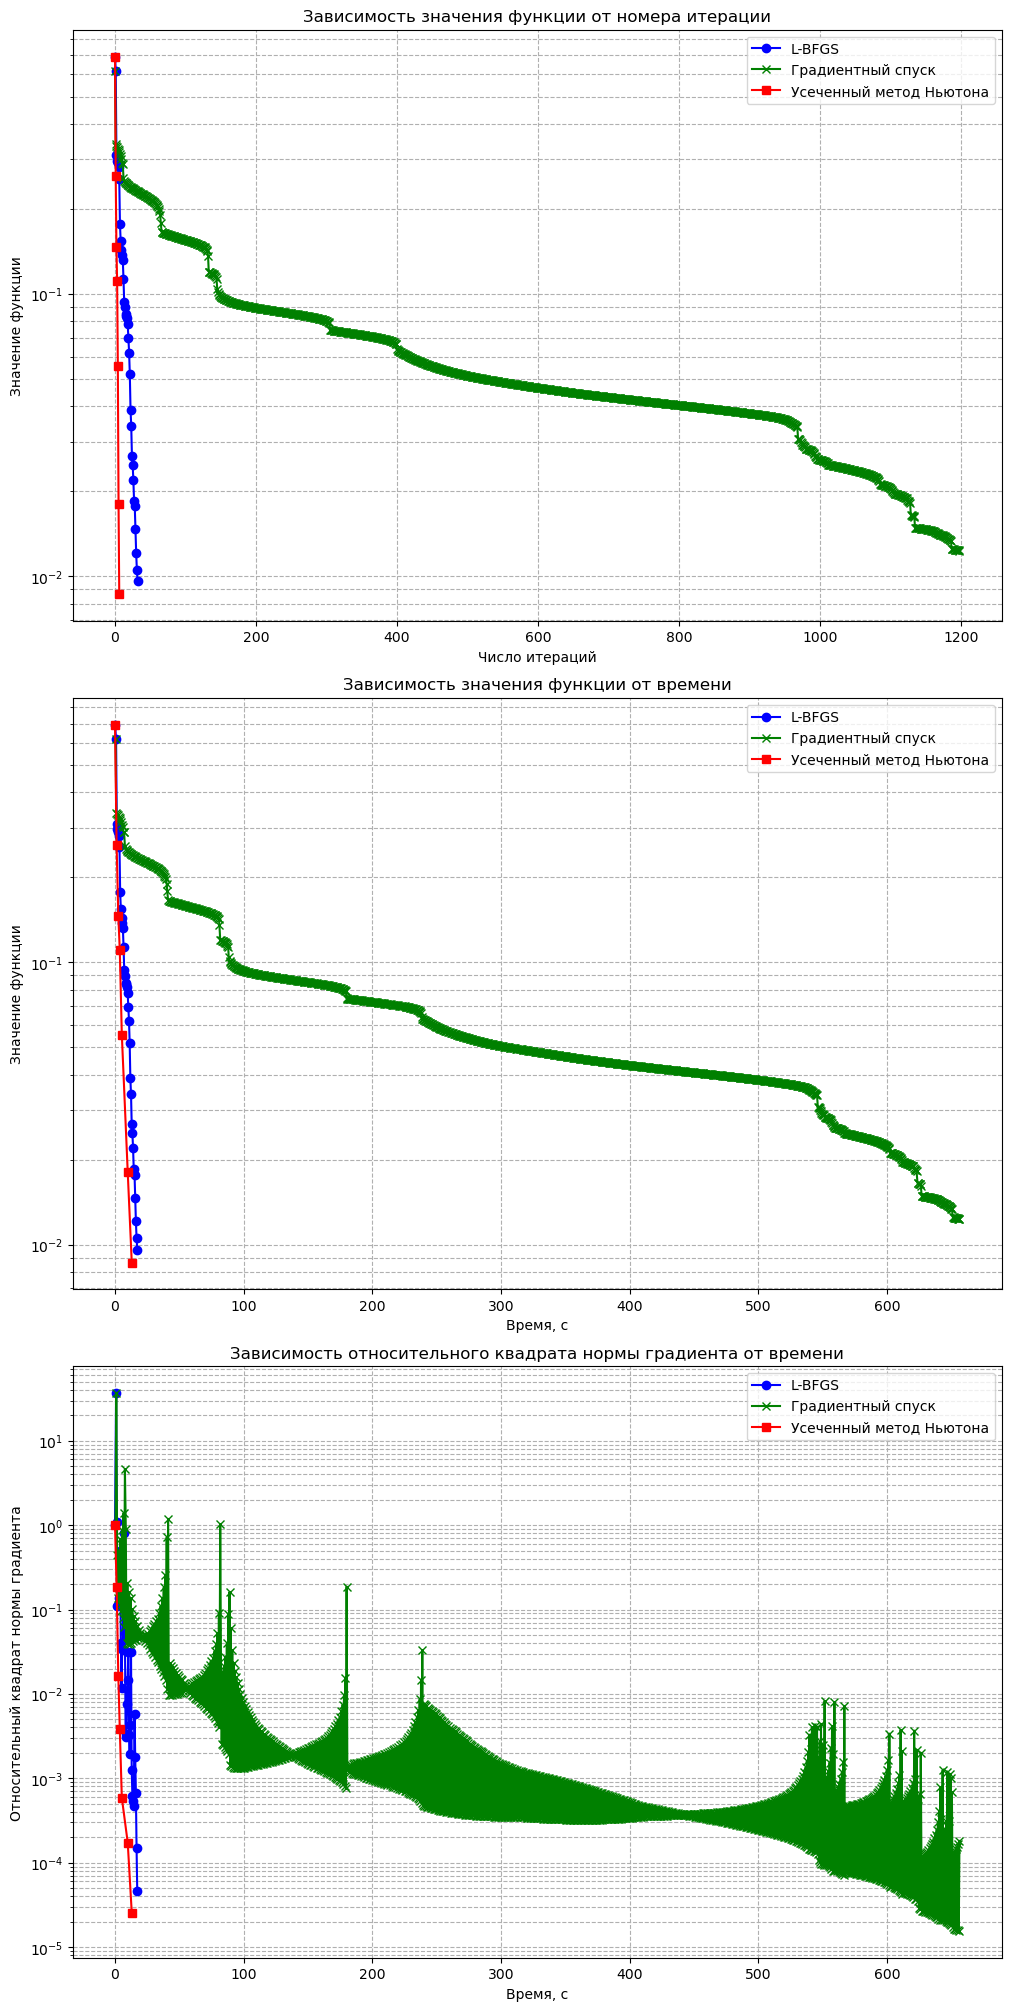

In [45]:
plots(hist_lbfgs_gissete, hist_newton_gissete, hist_grad_gissete)

### Dataset news20

In [26]:
xk_lbfgs_news20, msg_lbfgs_news20, hist_lbfgs_news20 = lbfgs(
news20_regul, 
news20_x, 
tolerance=1e-4, 
memory_size=10,
line_search_options=None, 
display=False, 
trace=True
)

xk_newton_news20, msg_newton_news20, hist_newton_news20 = hessian_free_newton(
news20_regul, 
news20_x, 
tolerance=1e-4, 
line_search_options=None, 
display=False, 
trace=True
)

xk_grad_news20, msg_grad_news20, hist_grad_news20 = gradient_descent(
news20_regul, 
news20_x, 
tolerance=1e-4, 
line_search_options=None, 
trace=True, 
display=False
)

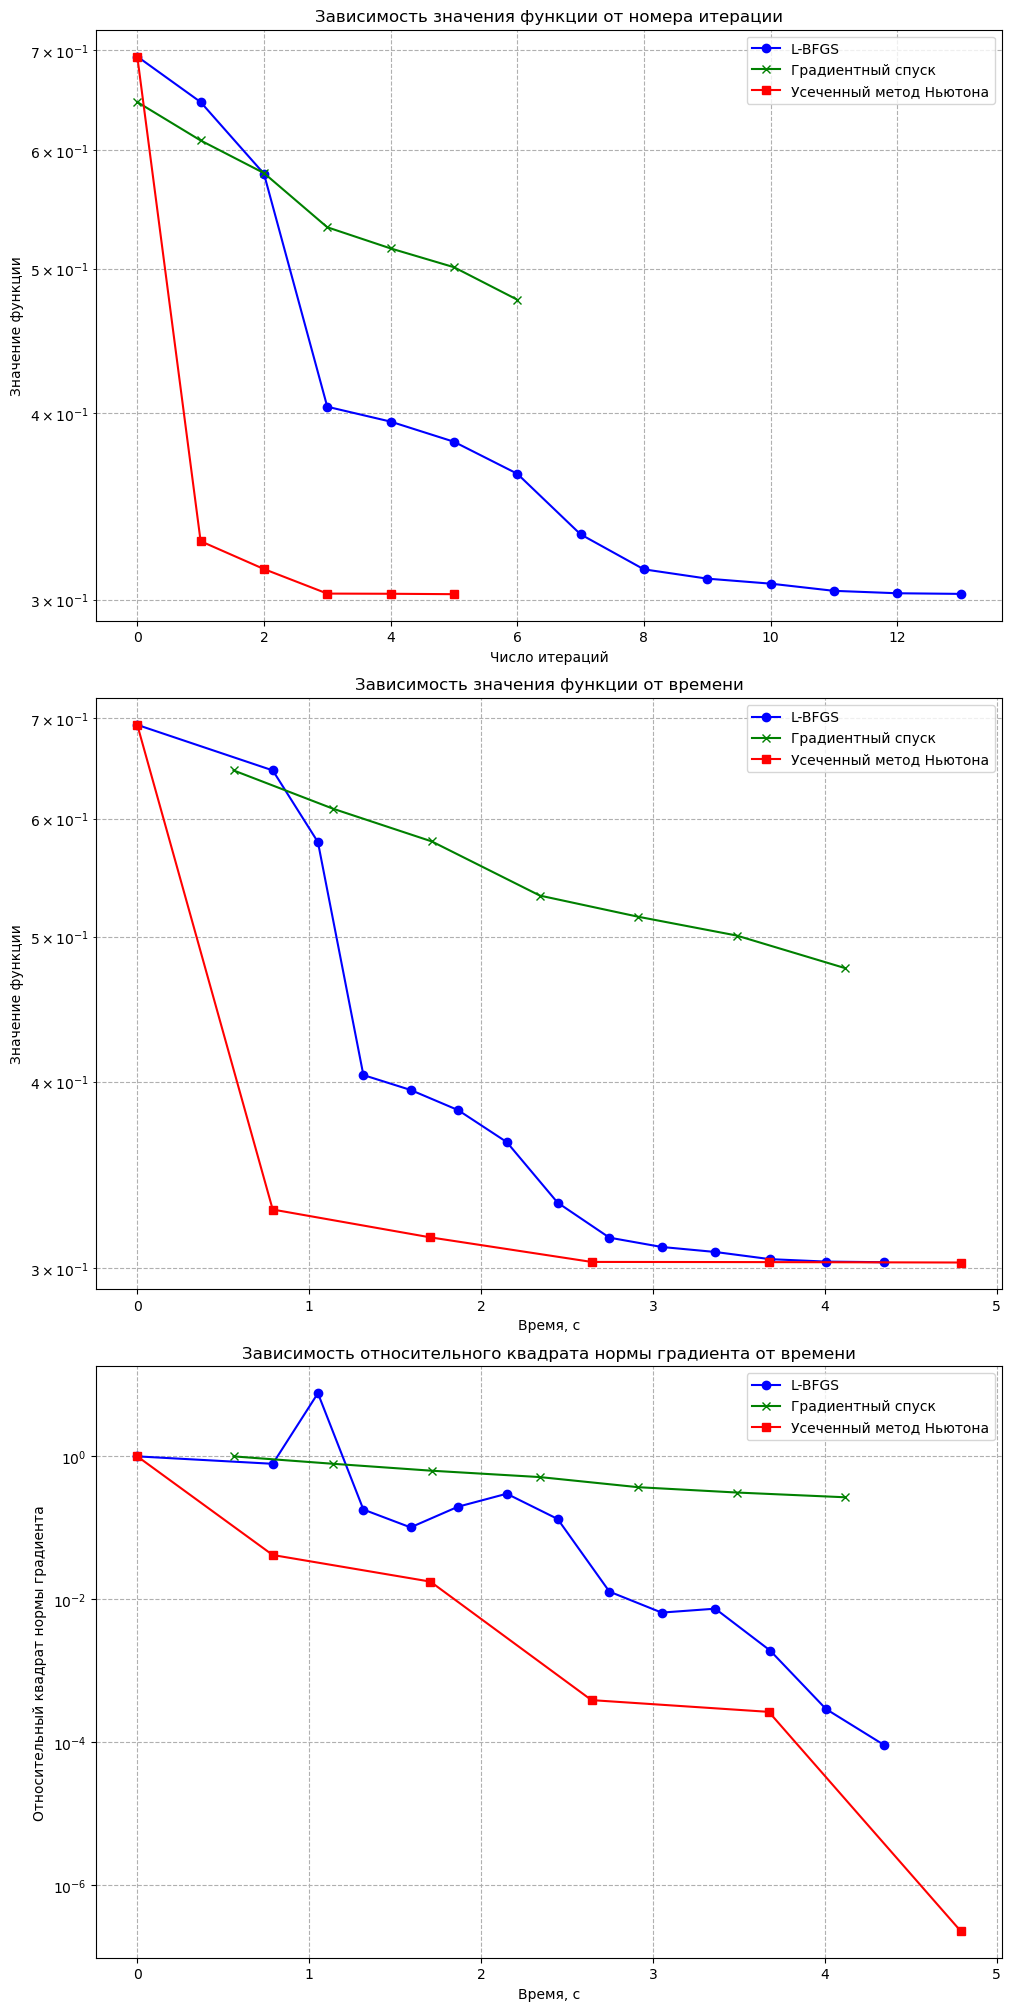

In [44]:
plots(hist_lbfgs_news20, hist_newton_news20, hist_grad_news20)

### Dataset w8a

In [28]:
xk_lbfgs_w8a, msg_lbfgs_w8a, hist_lbfgs_w8a = lbfgs(
w8a_regul, 
w8a_x, 
tolerance=1e-4, 
memory_size=10,
line_search_options=None, 
display=False, 
trace=True
)

xk_newton_w8a, msg_newton_w8a, hist_newton_w8a = hessian_free_newton(
w8a_regul, 
w8a_x, 
tolerance=1e-4, 
line_search_options=None, 
display=False, 
trace=True
)

xk_grad_w8a, msg_grad_w8a, hist_grad_w8a = gradient_descent(
w8a_regul, 
w8a_x, 
tolerance=1e-4, 
line_search_options=None, 
trace=True, 
display=False
)

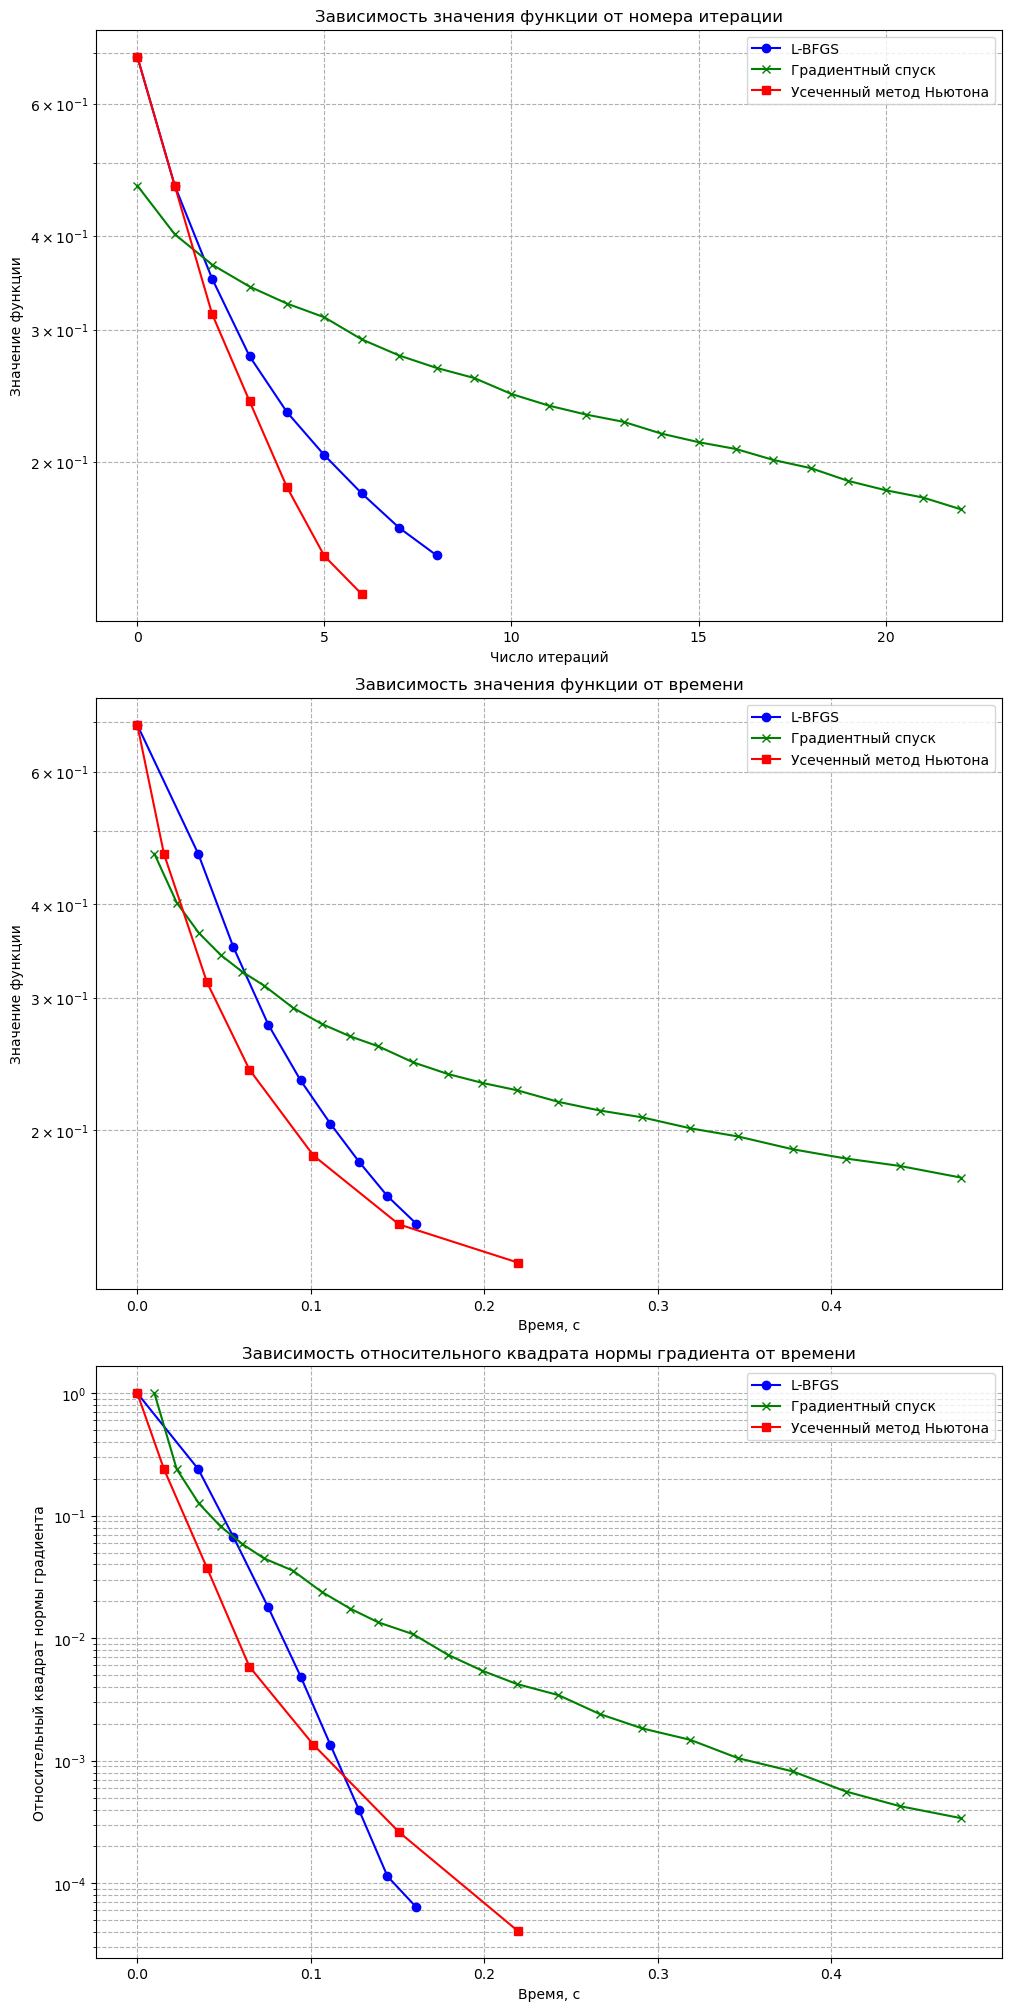

In [43]:
plots(hist_lbfgs_w8a, hist_newton_w8a, hist_grad_w8a)

### Dataset realsim

In [30]:
xk_lbfgs_realsim, msg_lbfgs_realsim, hist_lbfgs_realsim = lbfgs(
realsim_regul, 
realsim_x, 
tolerance=1e-4, 
memory_size=10,
line_search_options=None, 
display=False, 
trace=True
)

xk_newton_realsim, msg_newton_realsim, hist_newton_realsim = hessian_free_newton(
realsim_regul, 
realsim_x, 
tolerance=1e-4, 
line_search_options=None, 
display=False, 
trace=True
)

xk_grad_realsim, msg_grad_realsim, hist_grad_realsim = gradient_descent(
realsim_regul, 
realsim_x, 
tolerance=1e-4, 
line_search_options=None, 
trace=True, 
display=False
)

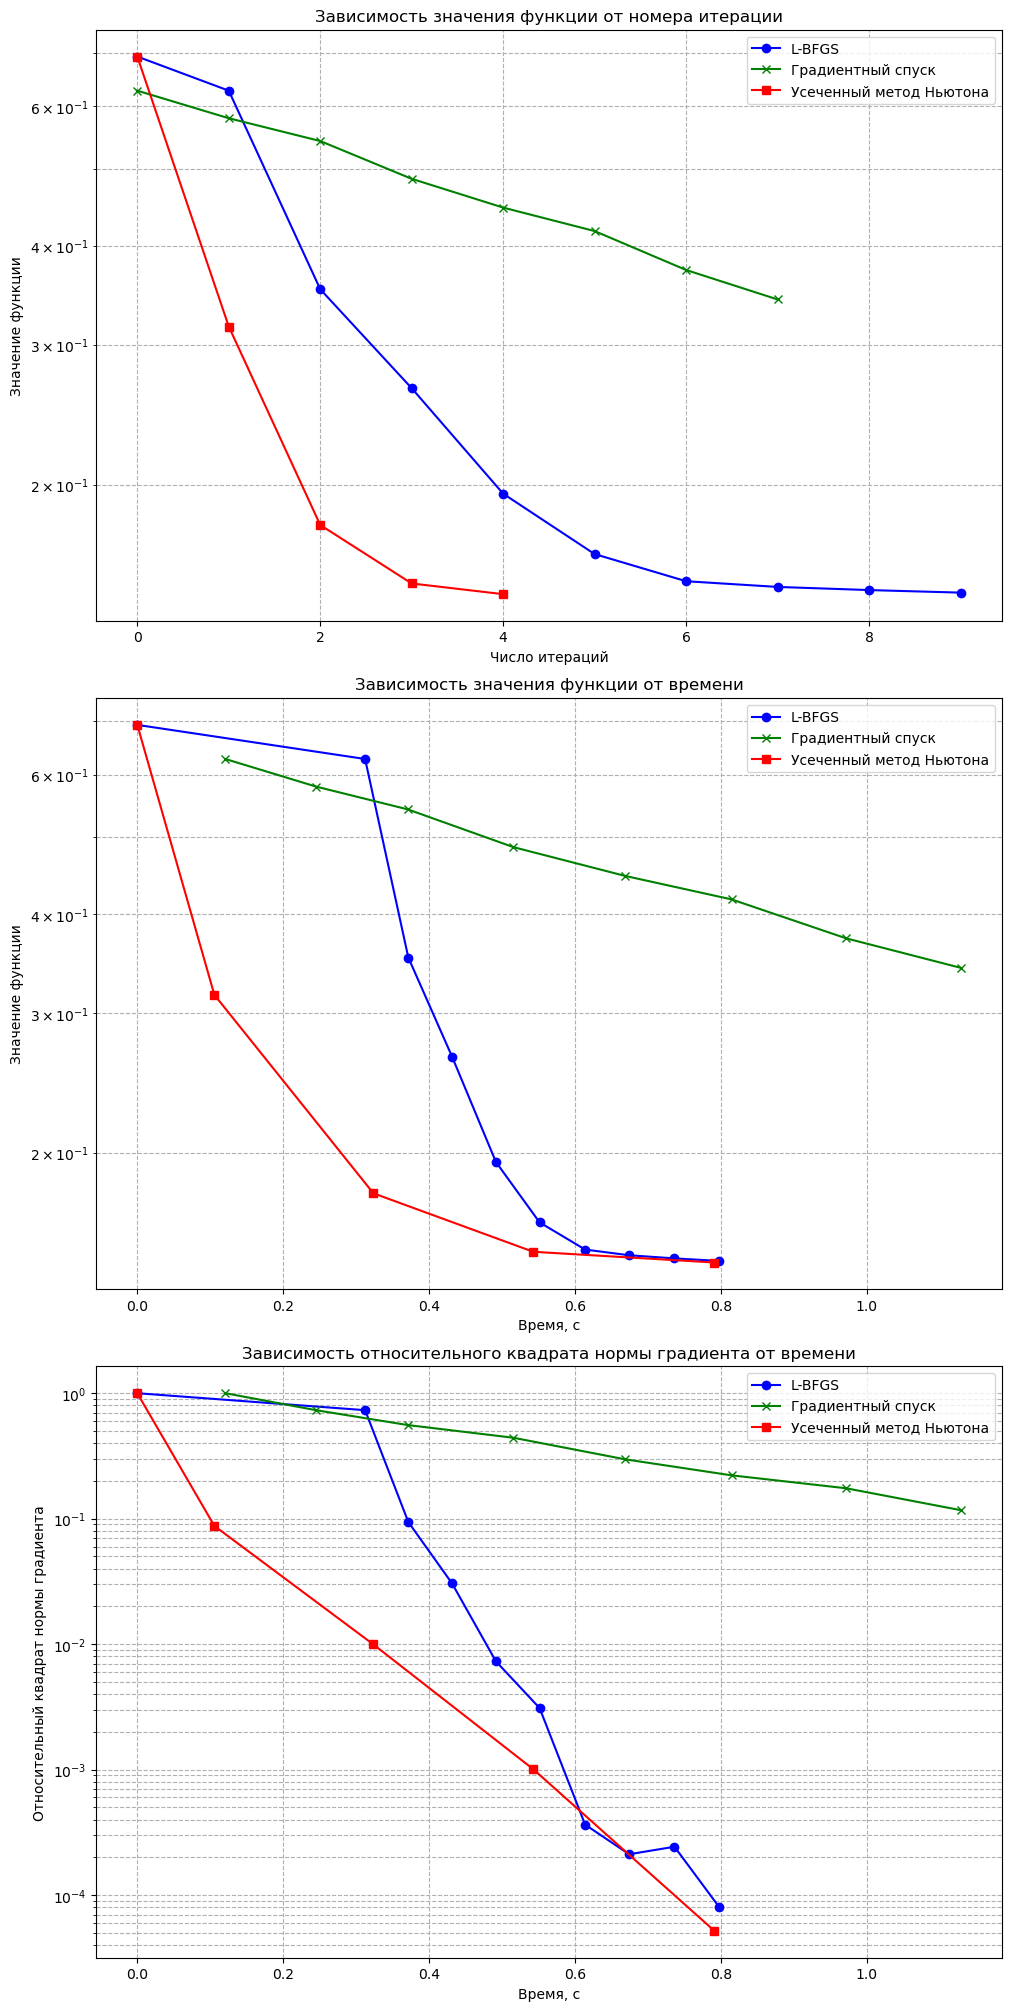

In [42]:
plots(hist_lbfgs_realsim, hist_newton_realsim, hist_grad_realsim)

### Dataset rcv

In [32]:
xk_lbfgs_rcv, msg_lbfgs_rcv, hist_lbfgs_rcv = lbfgs(
rcv_regul, 
rcv_x, 
tolerance=1e-4, 
memory_size=10,
line_search_options=None, 
display=False, 
trace=True
)

xk_newton_rcv, msg_newton_rcv, hist_newton_rcv = hessian_free_newton(
rcv_regul, 
rcv_x, 
tolerance=1e-4, 
line_search_options=None, 
display=False, 
trace=True
)

xk_grad_rcv, msg_grad_rcv, hist_grad_rcv = gradient_descent(
rcv_regul, 
rcv_x, 
tolerance=1e-4, 
line_search_options=None, 
trace=True, 
display=False
)

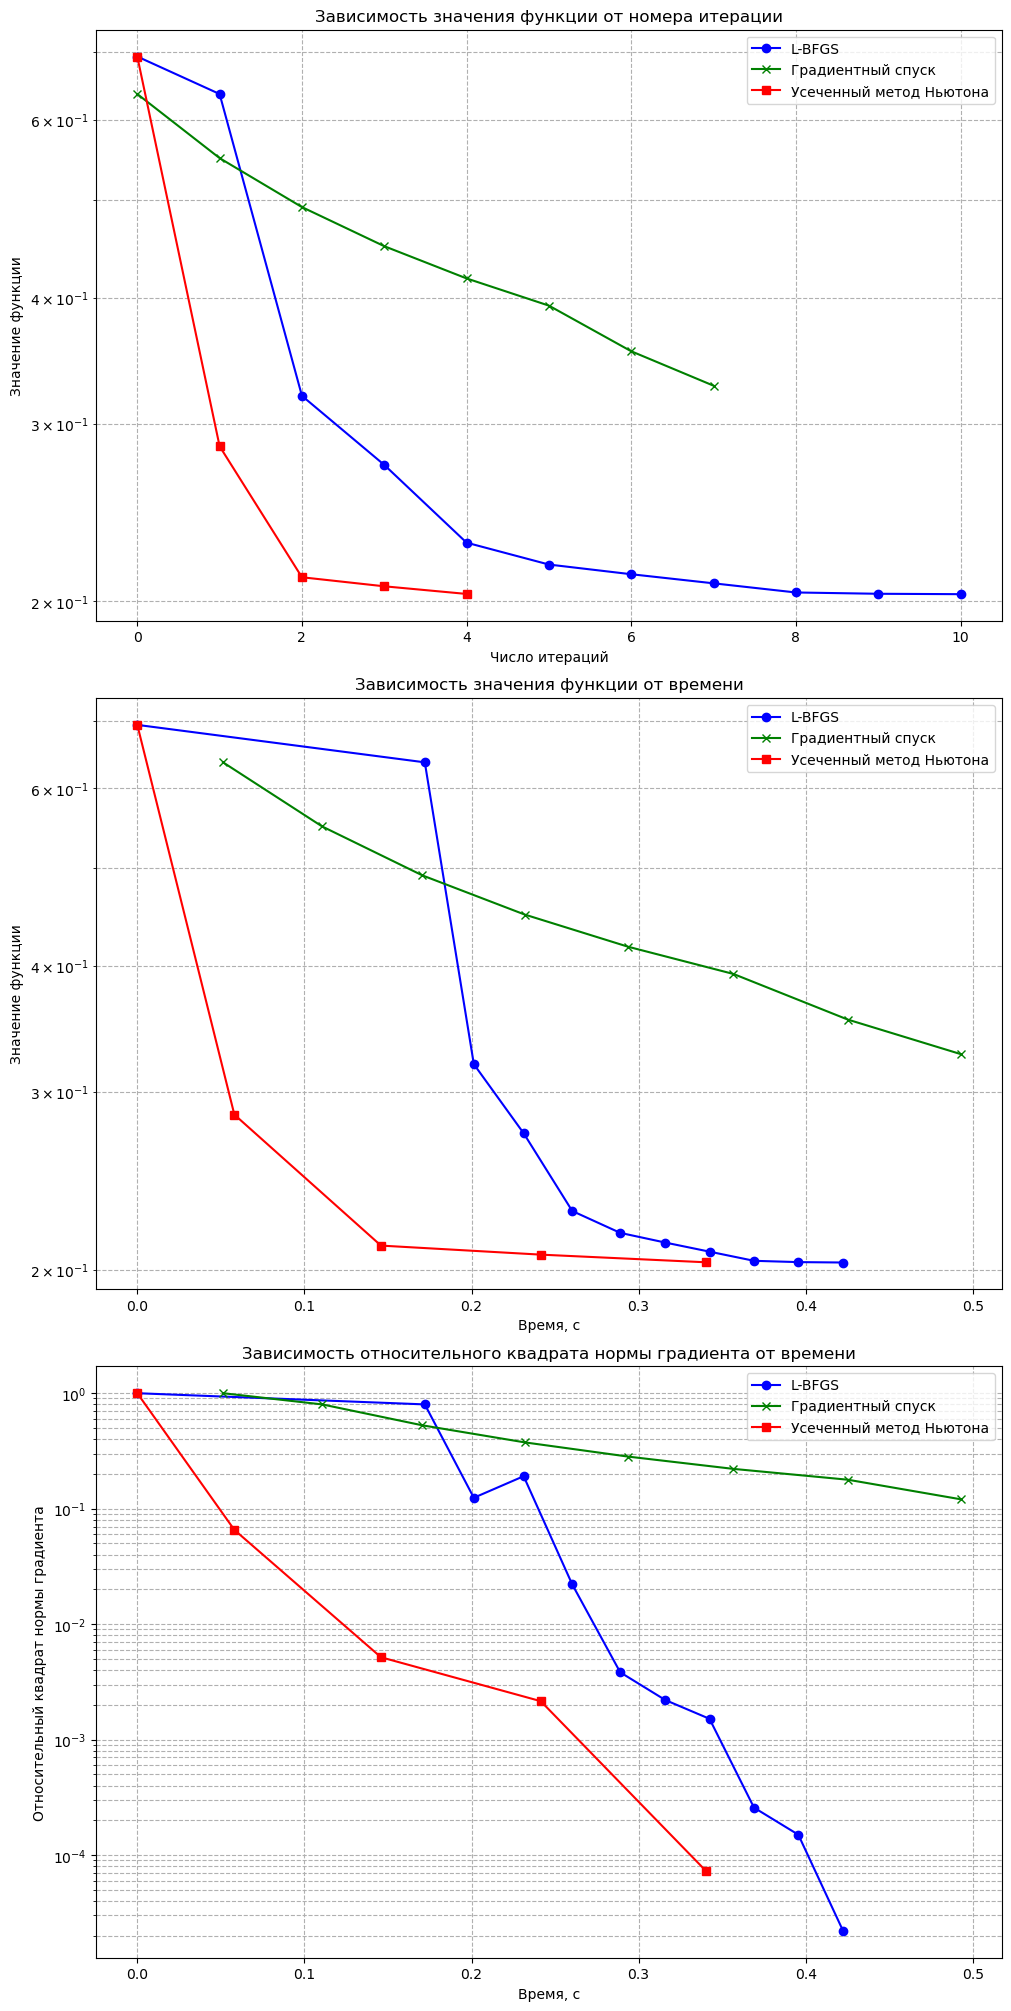

In [41]:
plots(hist_lbfgs_rcv, hist_newton_rcv, hist_grad_rcv)